In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
filepath = 'sample_data/travellevel.csv'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
# Read the data from the file
data = pd.read_csv(filepath)

# Convert the date column to datetime format
data['DATE'] = pd.to_datetime(data['DATE'])

# Filter the data for the desired time period
start_date = pd.to_datetime('2000-01-01')
end_date = pd.to_datetime('2023-01-01')
filtered_data = data[(data['DATE'] >= start_date) & (data['DATE'] <= end_date)]

# Construct variables in real terms
data['GAS_REAL'] = data['GAS'] - data['CPI']
#data['INCOME_REAL'] = data['INCOME'] - data['CPI']


# Construct variables in per capita terms
data['POP'] = data['POP'].replace(0, 1)  # Replace zero values with 1

data['TRANSIT_PER_CAPITA'] = data['TRANSIT'] / data['POP']
data['TRFVOL_PER_CAPITA'] = data['TRFVOL'] / data['POP']

# Drop the first row
data = data.drop(0)

# Drop the last row
data = data.drop(276)

# Reset the index
data = data.reset_index(drop=True)

data.head()


data.describe

<bound method NDFrame.describe of           DATE    GAS  TRANSIT     POP      CPI  TRFVOL  GAS_REAL  \
0   2000-02-01  1.371   756536  281299  170.000  199261  -168.629   
1   2000-03-01  1.498   843730  281531  171.000  232490  -169.502   
2   2000-04-01  1.437   757458  281763  170.900  227698  -169.463   
3   2000-05-01  1.456   818246  281996  171.200  242501  -169.744   
4   2000-06-01  1.612   793911  282247  172.200  242963  -170.588   
..         ...    ...      ...     ...      ...     ...       ...   
270 2022-08-01  3.822   532669  333799  295.320  281697  -291.498   
271 2022-09-01  3.563   563396  333976  296.539  273223  -292.976   
272 2022-10-01  3.637   582753  334141  297.987  278002  -294.350   
273 2022-11-01  3.530   548380  334287  298.598  256895  -295.068   
274 2022-12-01  3.084   519812  334420  298.990  256444  -295.906   

     TRANSIT_PER_CAPITA  TRFVOL_PER_CAPITA  
0              2.689437           0.708360  
1              2.996935           0.825806  
2 

<Figure size 640x480 with 0 Axes>

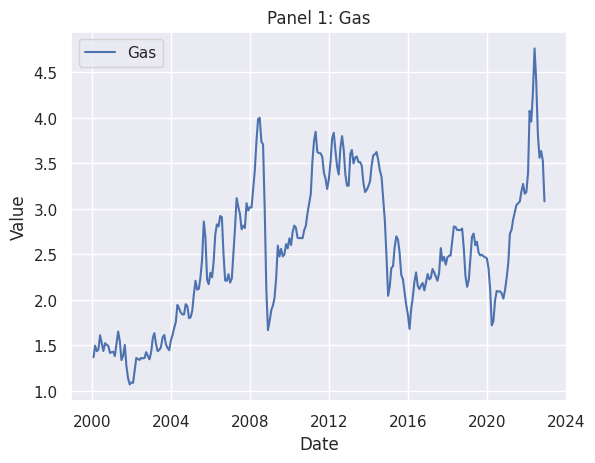

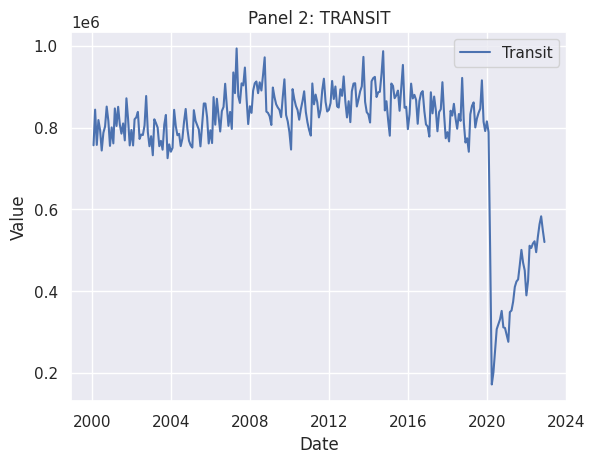

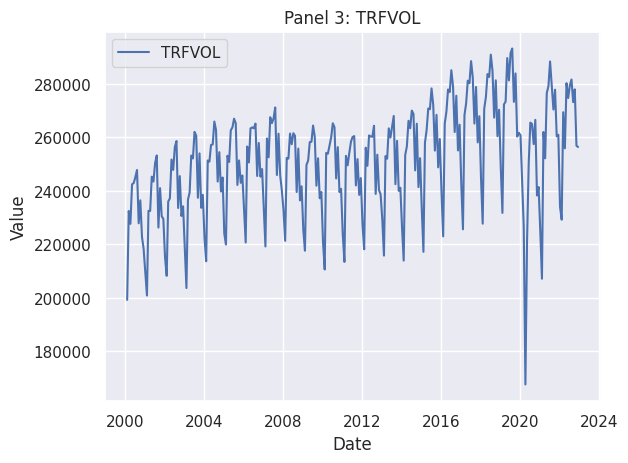

<Figure size 640x480 with 0 Axes>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plots
sns.set(style="darkgrid")

# Create the first group of panels
panel1 = sns.lineplot(data=data, x='DATE', y='GAS', label='Gas')
panel1.set_title('Panel 1: Gas')
panel1.set_xlabel('Date')
panel1.set_ylabel('Value')

plt.figure()

panel2 = sns.lineplot(data=data, x='DATE', y='TRANSIT', label='Transit')
panel2.set_title('Panel 2: TRANSIT')
panel2.set_xlabel('Date')
panel2.set_ylabel('Value')

plt.figure()

panel3 = sns.lineplot(data=data, x='DATE', y='TRFVOL', label='TRFVOL')
panel3.set_title('Panel 3: TRFVOL')
panel3.set_xlabel('Date')
panel3.set_ylabel('Value')

plt.figure()


In [ ]:
import pandas as pd

# Assuming your dataframe is named 'data'
# Initialize 'filtered_data' DataFrame
filtered_data = pd.DataFrame()

# Assign values to 'filtered_data' DataFrame columns
filtered_data['DATE'] = data['DATE']
filtered_data['CPI'] = data['CPI']
filtered_data['TRANSIT'] = data['TRANSIT']
filtered_data['GAS'] = data['GAS']
filtered_data['GAS_REAL'] = data['GAS_REAL']
filtered_data['TRFVOL'] = data['TRFVOL']
filtered_data['TRANSIT_PER_CAPITA'] = data['TRANSIT_PER_CAPITA']
filtered_data['TRFVOL_PER_CAPITA'] = data['TRFVOL_PER_CAPITA']

# Calculate percent changes
filtered_data['dCPI'] = filtered_data['CPI'].pct_change() * 100
filtered_data['dTRANSIT'] = filtered_data['TRANSIT'].pct_change() * 100
filtered_data['dGAS'] = filtered_data['GAS'].pct_change() * 100
filtered_data['dTRFVOL'] = filtered_data['TRFVOL'].pct_change() * 100
filtered_data['dTRANSIT_PER_CAPITA'] = filtered_data['TRANSIT_PER_CAPITA'].pct_change() * 100
filtered_data['dTRFVOL_PER_CAPITA'] = filtered_data['TRFVOL_PER_CAPITA'].pct_change() * 100

# Drop the first row
filtered_data = filtered_data.drop(0)

# Reset the index
filtered_data = filtered_data.reset_index(drop=True)

# Print the updated dataframe
print(filtered_data.head())


        DATE    CPI  TRANSIT    GAS  GAS_REAL  TRFVOL  TRANSIT_PER_CAPITA  \
0 2000-03-01  171.0   843730  1.498  -169.502  232490            2.996935   
1 2000-04-01  170.9   757458  1.437  -169.463  227698            2.688281   
2 2000-05-01  171.2   818246  1.456  -169.744  242501            2.901623   
3 2000-06-01  172.2   793911  1.612  -170.588  242963            2.812824   
4 2000-07-01  172.7   743746  1.529  -171.171  245140            2.632692   

   TRFVOL_PER_CAPITA      dCPI   dTRANSIT       dGAS    dTRFVOL  \
0           0.825806  0.588235  11.525426   9.263311  16.676118   
1           0.808119 -0.058480 -10.225072  -4.072096  -2.061164   
2           0.859945  0.175541   8.025263   1.322199   6.501155   
3           0.860817  0.584112  -2.974044  10.714286   0.190515   
4           0.867740  0.290360  -6.318718  -5.148883   0.896021   

   dTRANSIT_PER_CAPITA  dTRFVOL_PER_CAPITA  
0            11.433522           16.579969  
1           -10.298992           -2.141805  

In [ ]:
100*(filtered_data['dGAS'] / filtered_data['CPI']).head()

0    5.417141
1   -2.382736
2    0.772313
3    6.222001
4   -2.981403
dtype: float64

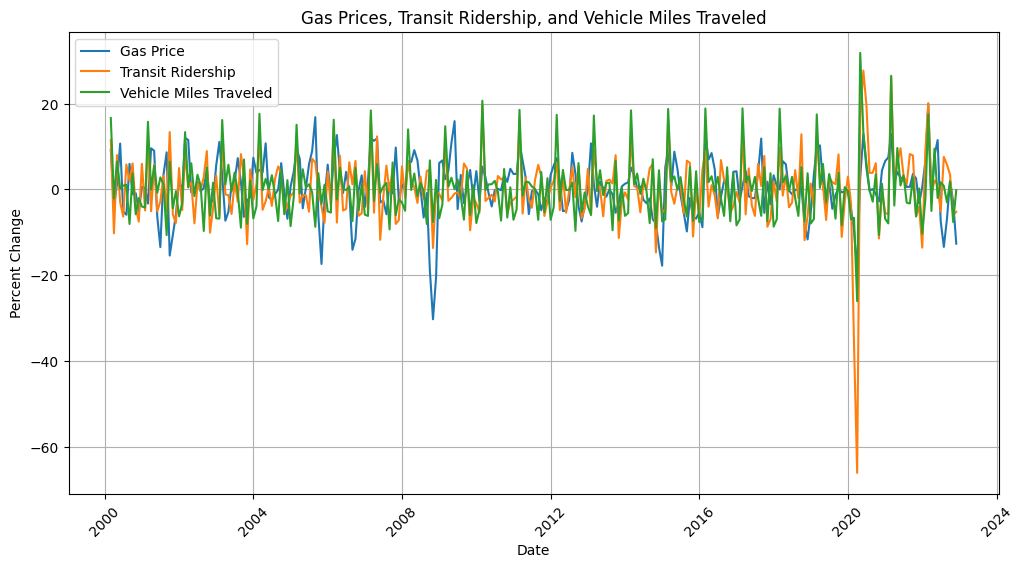

In [ ]:
# Line plot of gas prices, transit ridership, and vehicle miles traveled
plt.figure(figsize=(12, 6))
plt.plot(filtered_data['DATE'], filtered_data['dGAS'], label='Gas Price')
plt.plot(filtered_data['DATE'], filtered_data['dTRANSIT'], label='Transit Ridership')
plt.plot(filtered_data['DATE'], filtered_data['dTRFVOL'], label='Vehicle Miles Traveled')
plt.xlabel('Date')
plt.ylabel('Percent Change')
plt.title('Gas Prices, Transit Ridership, and Vehicle Miles Traveled')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [ ]:
filtered_data.head()

,DATE,CPI,TRANSIT,GAS,TRFVOL,dCPI,dTRANSIT,dGAS,dTRFVOL
0,2000-04-01,170.9,757458,1.437,227698,-0.058480,-10.225072,-4.072096,-2.061164
1,2000-05-01,171.2,818246,1.456,242501,0.175541,8.025263,1.322199,6.501155
2,2000-06-01,172.2,793911,1.612,242963,0.584112,-2.974044,10.714286,0.190515
3,2000-07-01,172.7,743746,1.529,245140,0.290360,-6.318718,-5.148883,0.896021
4,2000-08-01,172.7,787064,1.439,247832,0.000000,5.824300,-5.886200,1.098148


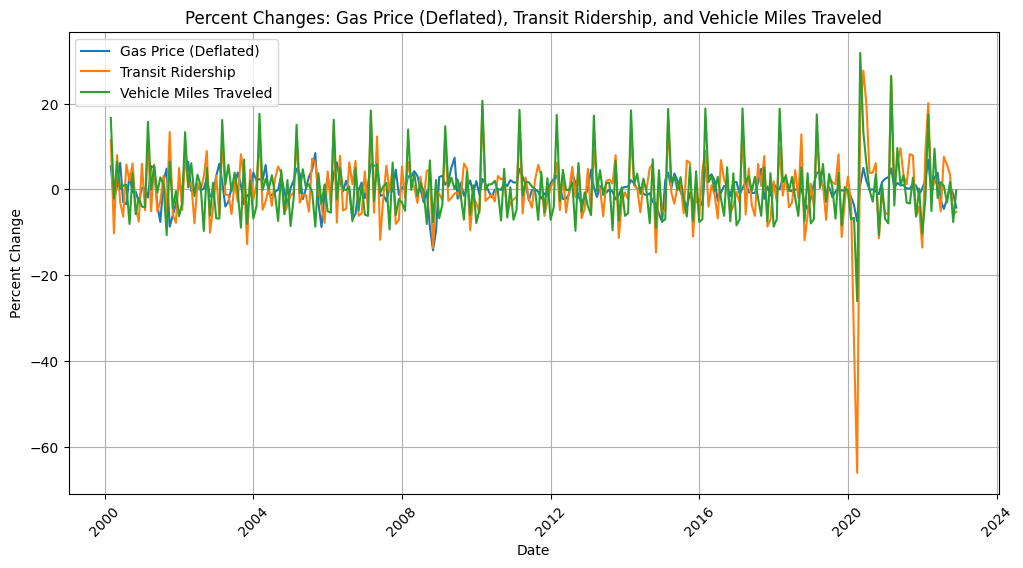

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataframe is named 'filtered_data'
plt.figure(figsize=(12, 6))
plt.plot(filtered_data['DATE'], 100*(filtered_data['dGAS'] / filtered_data['CPI']), label='Gas Price (Deflated)')
plt.plot(filtered_data['DATE'], filtered_data['dTRANSIT'], label='Transit Ridership')
plt.plot(filtered_data['DATE'], filtered_data['dTRFVOL'], label='Vehicle Miles Traveled')
plt.xlabel('Date')
plt.ylabel('Percent Change')
plt.title('Percent Changes: Gas Price (Deflated), Transit Ridership, and Vehicle Miles Traveled')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



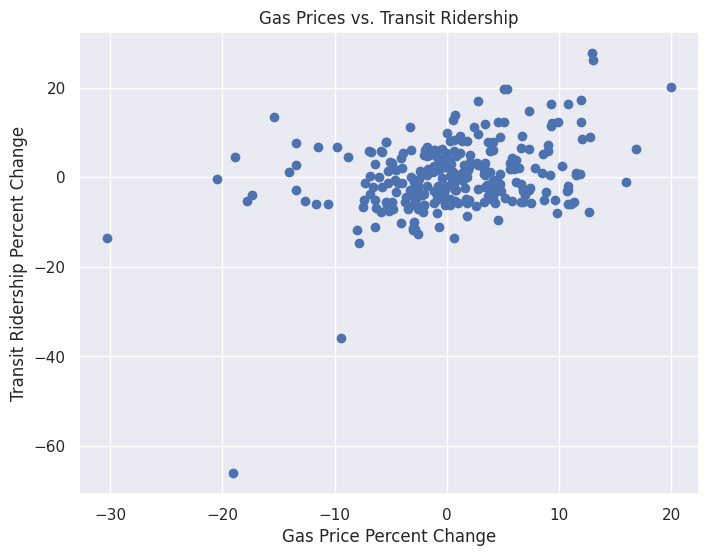

In [ ]:
# Scatter plot of gas prices vs. transit ridership
plt.figure(figsize=(8, 6))
plt.scatter(filtered_data['dGAS'], filtered_data['dTRANSIT'])
plt.xlabel('Gas Price Percent Change')
plt.ylabel('Transit Ridership Percent Change')
plt.title('Gas Prices vs. Transit Ridership')
plt.grid(True)
plt.show()

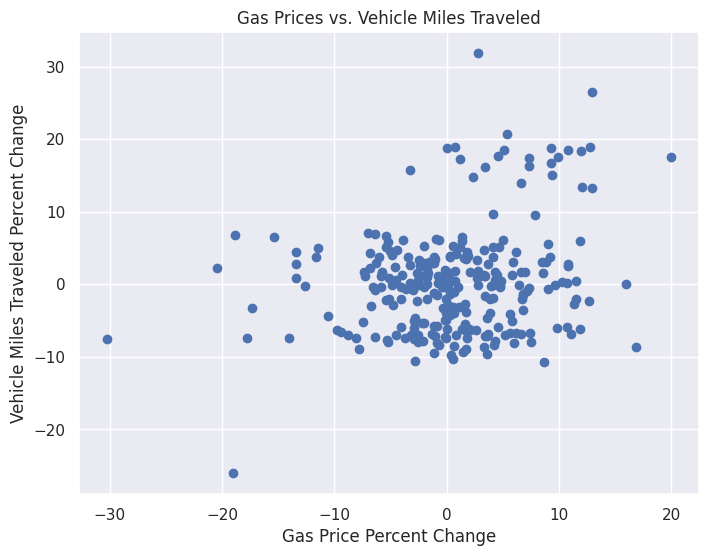

In [ ]:
# Scatter plot of gas prices vs. vehicle miles traveled
plt.figure(figsize=(8, 6))
plt.scatter(filtered_data['dGAS'], filtered_data['dTRFVOL'])
plt.xlabel('Gas Price Percent Change')
plt.ylabel('Vehicle Miles Traveled Percent Change')
plt.title('Gas Prices vs. Vehicle Miles Traveled')
plt.grid(True)
plt.show()

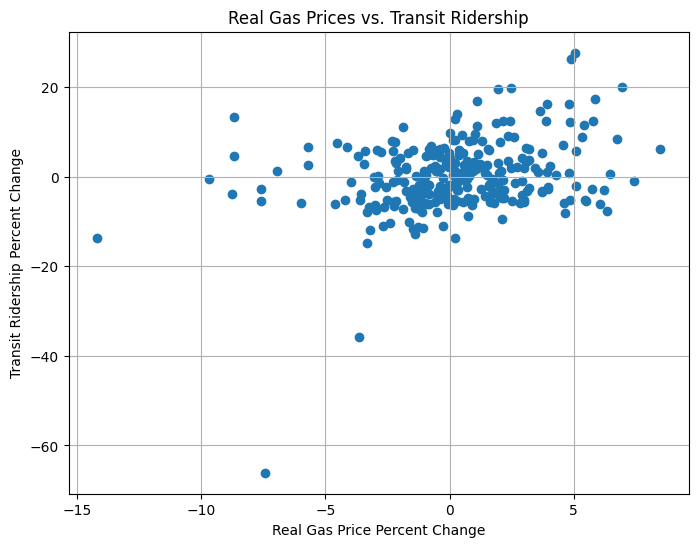

In [ ]:
# Scatter plot of real gas prices vs. transit ridership
plt.figure(figsize=(8, 6))
plt.scatter(100*(filtered_data['dGAS'] / filtered_data['CPI']), filtered_data['dTRANSIT'])
plt.xlabel('Real Gas Price Percent Change')
plt.ylabel('Transit Ridership Percent Change')
plt.title('Real Gas Prices vs. Transit Ridership')
plt.grid(True)
plt.show()

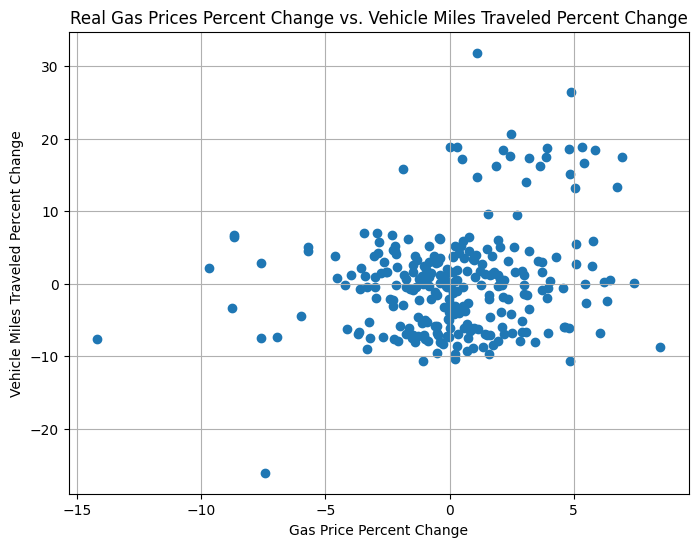

In [ ]:
# Scatter plot of real gas prices vs. vehicle miles traveled
plt.figure(figsize=(8, 6))
plt.scatter(100*(filtered_data['dGAS'] / filtered_data['CPI']), filtered_data['dTRFVOL'])
plt.xlabel('Gas Price Percent Change')
plt.ylabel('Vehicle Miles Traveled Percent Change')
plt.title('Real Gas Prices Percent Change vs. Vehicle Miles Traveled Percent Change')
plt.grid(True)
plt.show()

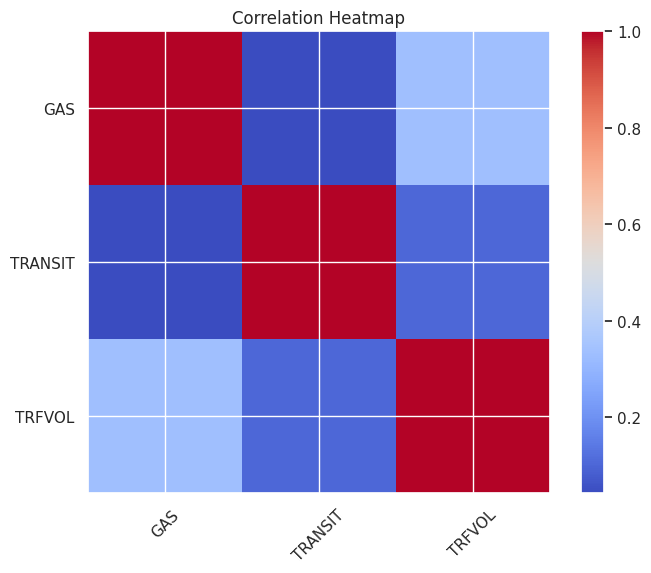

In [ ]:
# Correlation heatmap
correlation_matrix = filtered_data[['GAS', 'TRANSIT', 'TRFVOL']].corr()
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.title('Correlation Heatmap')
plt.show()


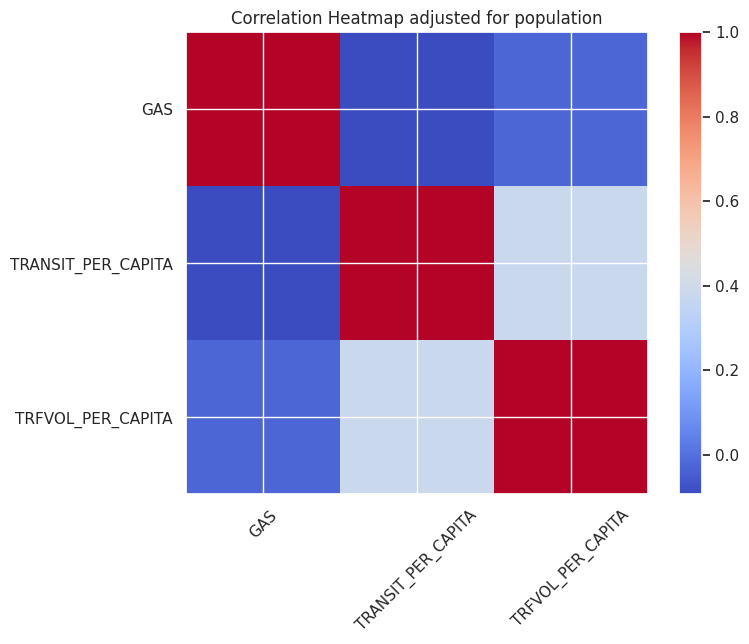

In [ ]:
# Correlation heatmap
correlation_matrix = filtered_data[['GAS', 'TRANSIT_PER_CAPITA', 'TRFVOL_PER_CAPITA']].corr()
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.title('Correlation Heatmap adjusted for population')
plt.show()


In [ ]:
import seaborn as sns
# Calculate the correlation matrix
corrmat = data.corr()
print(corrmat)

                         GAS   TRANSIT       POP       CPI    TRFVOL  \
GAS                 1.000000  0.043263  0.535188  0.603699  0.343727   
TRANSIT             0.043263  1.000000 -0.358521 -0.442193  0.105067   
POP                 0.535188 -0.358521  1.000000  0.973742  0.446433   
CPI                 0.603699 -0.442193  0.973742  1.000000  0.438560   
TRFVOL              0.343727  0.105067  0.446433  0.438560  1.000000   
GAS_REAL           -0.587809  0.449805 -0.974858 -0.999804 -0.436515   
TRANSIT_PER_CAPITA -0.094310  0.971203 -0.569678 -0.635066 -0.017249   
TRFVOL_PER_CAPITA  -0.016616  0.357920 -0.234761 -0.224042  0.763753   

                    GAS_REAL  TRANSIT_PER_CAPITA  TRFVOL_PER_CAPITA  
GAS                -0.587809           -0.094310          -0.016616  
TRANSIT             0.449805            0.971203           0.357920  
POP                -0.974858           -0.569678          -0.234761  
CPI                -0.999804           -0.635066          -0.224042  
T

<ipython-input-50-3d77b547286b>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = data.corr()


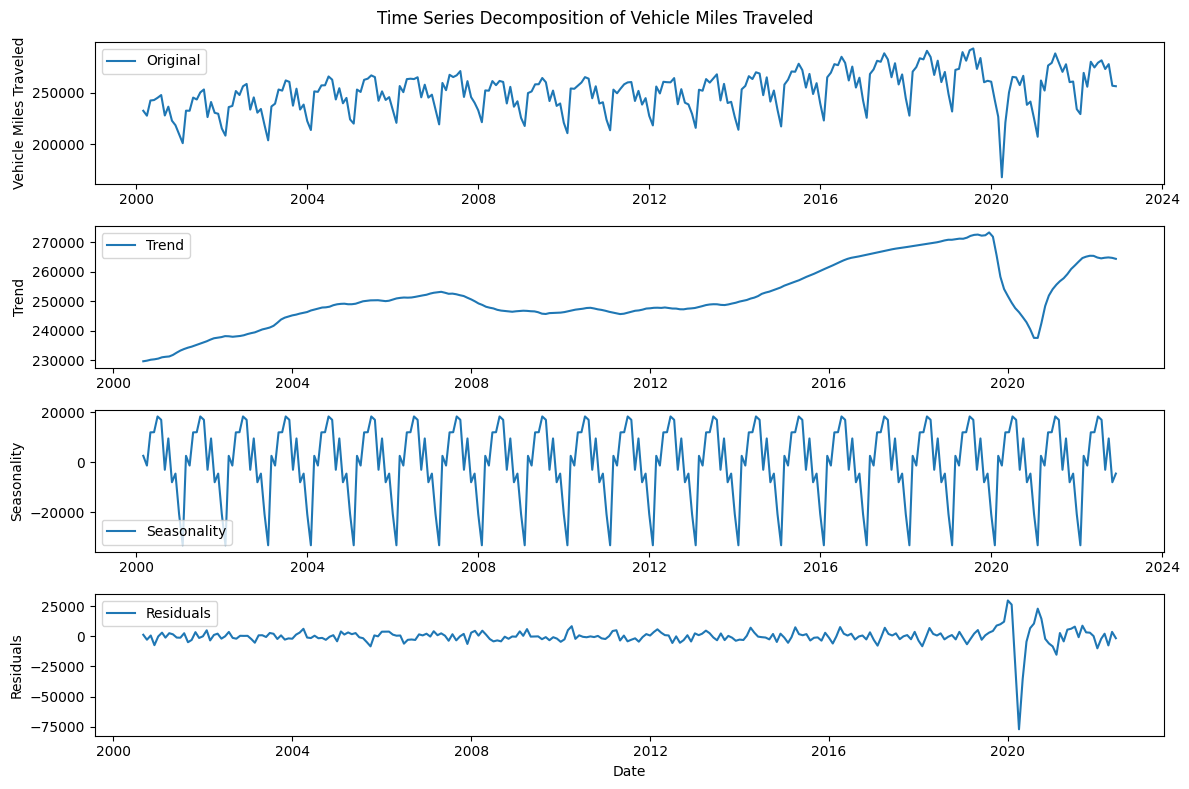

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Time series decomposition of vehicle miles traveled
ts = filtered_data[['DATE', 'TRFVOL']].set_index('DATE')
decomposition = sm.tsa.seasonal_decompose(ts, model='additive')

plt.figure(figsize=(12, 8))

# Original time series
plt.subplot(411)
plt.plot(ts, label='Original')
plt.legend(loc='best')
plt.ylabel('Vehicle Miles Traveled')

# Trend component
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.ylabel('Trend')

# Seasonal component
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='best')
plt.ylabel('Seasonality')

# Residual component
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='best')
plt.ylabel('Residuals')

plt.xlabel('Date')
plt.suptitle('Time Series Decomposition of Vehicle Miles Traveled')
plt.tight_layout()
plt.show()


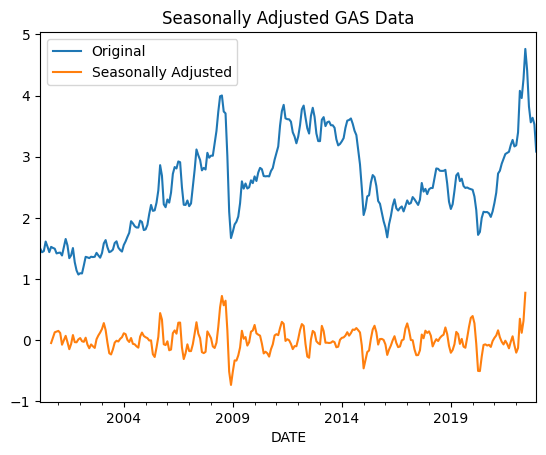

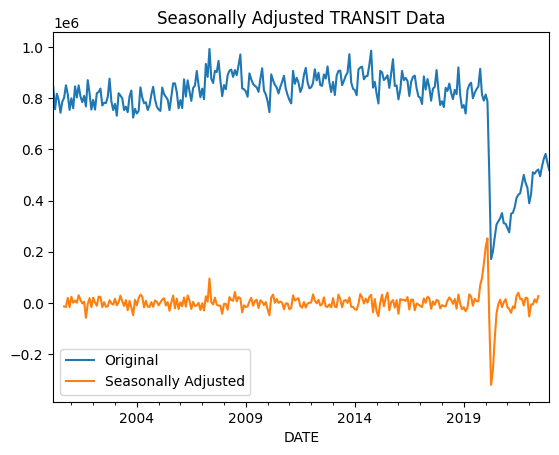

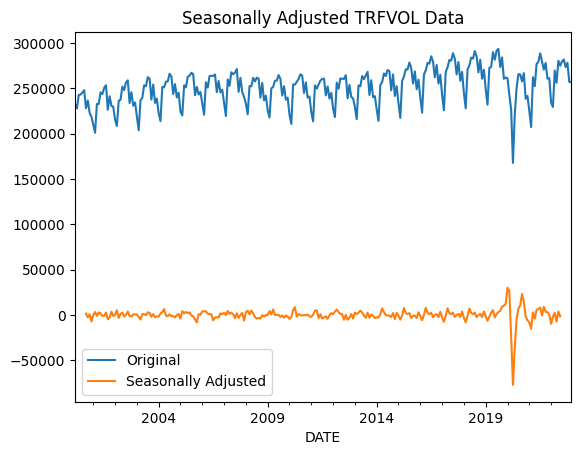

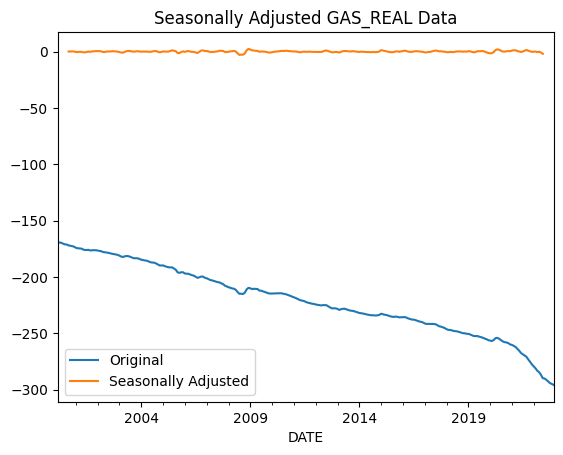

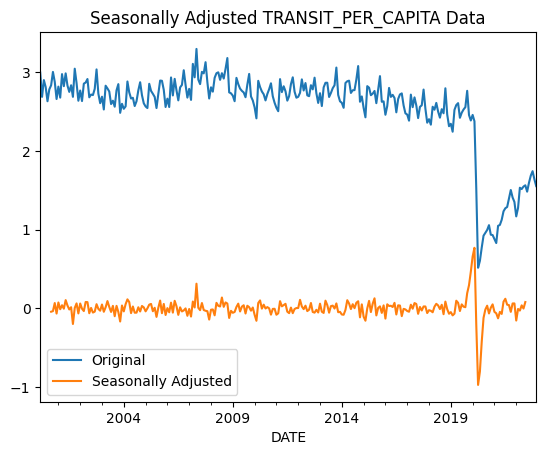

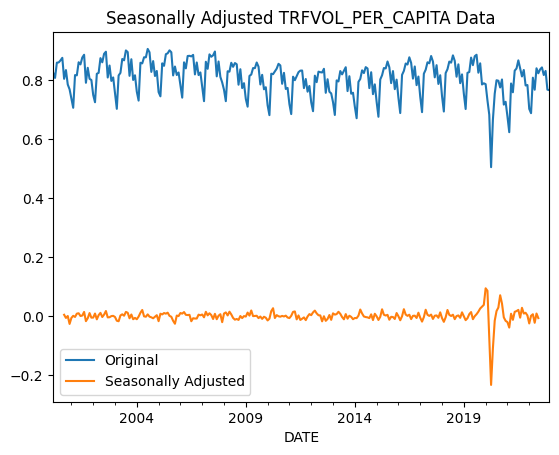

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load your non-seasonally adjusted data into a pandas DataFrame
# Assuming 'data' is a pandas DataFrame with variables 'DATE', 'GAS', 'TRANSIT', 'TRFVOL'
data = filtered_data[['DATE', 'GAS', 'TRANSIT', 'TRFVOL', 'GAS_REAL', 'TRANSIT_PER_CAPITA', 'TRFVOL_PER_CAPITA']].copy()

# Convert the 'DATE' column to a proper date format if needed
data['DATE'] = pd.to_datetime(data['DATE'])

# Set the 'DATE' column as the index of the DataFrame
data.set_index('DATE', inplace=True)

# Extract the variable names from the DataFrame
variable_names = data.columns

# Create an empty DataFrame to store the adjusted data
adjusted_data = pd.DataFrame(index=data.index)

# Perform seasonal adjustment for each variable
for variable in variable_names:
    result = sm.tsa.seasonal_decompose(data[variable], model='additive')
    seasonal = result.seasonal
    trend = result.trend
    adjusted_data[variable] = data[variable] - seasonal - trend

# Plot the original data and the seasonally adjusted data for each variable
for variable in variable_names:
    data[variable].plot(title=f'Original {variable} Data')
    adjusted_data[variable].plot(title=f'Seasonally Adjusted {variable} Data')
    plt.legend(['Original', 'Seasonally Adjusted'])
    plt.show()



In [ ]:
# Retrieve the adjusted data for correlation and analysis
adjusted_data = adjusted_data.dropna()  # Drop any rows with missing values, if any
adjusted_data.reset_index(inplace=True)  # Reset the index to numeric values

# Perform correlation analysis on the adjusted data
correlation_matrix = adjusted_data.corr()

# Perform further analysis on the adjusted data as needed
# ...

# Display the correlation matrix
print(correlation_matrix)
print(adjusted_data.head())


                         GAS   TRANSIT    TRFVOL  GAS_REAL  \
GAS                 1.000000  0.385043  0.175702 -0.835595   
TRANSIT             0.385043  1.000000  0.768568 -0.408430   
TRFVOL              0.175702  0.768568  1.000000 -0.175465   
GAS_REAL           -0.835595 -0.408430 -0.175465  1.000000   
TRANSIT_PER_CAPITA  0.384381  0.998730  0.756864 -0.410081   
TRFVOL_PER_CAPITA   0.163630  0.774455  0.994118 -0.174095   

                    TRANSIT_PER_CAPITA  TRFVOL_PER_CAPITA  
GAS                           0.384381           0.163630  
TRANSIT                       0.998730           0.774455  
TRFVOL                        0.756864           0.994118  
GAS_REAL                     -0.410081          -0.174095  
TRANSIT_PER_CAPITA            1.000000           0.764726  
TRFVOL_PER_CAPITA             0.764726           1.000000  
        DATE       GAS       TRANSIT       TRFVOL  GAS_REAL  \
0 2000-09-01 -0.048399 -14106.589910  1378.927827  0.084912   
1 2000-10-01  0.038

<ipython-input-30-c68da8b49074>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = adjusted_data.corr()


In [ ]:
filtered_data.head()

,DATE,CPI,TRANSIT,GAS,GAS_REAL,TRFVOL,TRANSIT_PER_CAPITA,TRFVOL_PER_CAPITA,dCPI,dTRANSIT,dGAS,dTRFVOL,dTRANSIT_PER_CAPITA,dTRFVOL_PER_CAPITA
0,2000-03-01,171.0,843730,1.498,-169.502,232490,2.996935,0.825806,0.588235,11.525426,9.263311,16.676118,11.433522,16.579969
1,2000-04-01,170.9,757458,1.437,-169.463,227698,2.688281,0.808119,-0.058480,-10.225072,-4.072096,-2.061164,-10.298992,-2.141805
2,2000-05-01,171.2,818246,1.456,-169.744,242501,2.901623,0.859945,0.175541,8.025263,1.322199,6.501155,7.936007,6.413158
3,2000-06-01,172.2,793911,1.612,-170.588,242963,2.812824,0.860817,0.584112,-2.974044,10.714286,0.190515,-3.060329,0.101416
4,2000-07-01,172.7,743746,1.529,-171.171,245140,2.632692,0.867740,0.290360,-6.318718,-5.148883,0.896021,-6.403942,0.804234


In [ ]:
# Assign values to 'adjusted_data' DataFrame columns
adjusted_data['DATE'] = filtered_data['DATE']
adjusted_data['CPI'] = filtered_data['CPI']
adjusted_data['POP'] = filtered_data['POP']

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Perform time series decomposition
#decomposition = sm.tsa.seasonal_decompose(data['TRFVOL'], model='additive')

# Extract the components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Statistical analysis on the components
# Example 1: Calculate mean and standard deviation of the trend component
trend_mean = np.mean(trend)
trend_std = np.std(trend)

# Example 2: Perform a t-test on the seasonal component
seasonal_mean = np.mean(seasonal)
seasonal_ttest = sm.stats.ttest_ind(seasonal, np.zeros(len(seasonal)))

# Example 3: Calculate autocorrelation of the residual component
residual_autocorr = sm.tsa.stattools.acf(residual)

# Print the results
print("Trend component:")
print("Mean:", trend_mean)
print("Standard Deviation:", trend_std)
print()

print("Seasonal component:")
print("Mean:", seasonal_mean)
print("T-Test Result:")
print("T-Statistic:", seasonal_ttest[0])
print("P-Value:", seasonal_ttest[1])
print()

print("Residual component:")
print("Autocorrelation:", residual_autocorr)
#


Trend component:
Mean: 251480.7919847328
Standard Deviation: 10392.569658659524

Seasonal component:
Mean: 196.8915255592943
T-Test Result:
T-Statistic: 0.2219157233384179
P-Value: 0.8244624669104144

Residual component:
Autocorrelation: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan]


In [ ]:
import pandas as pd
import statsmodels.api as sm

# Load the data
#data2 = pd.read_csv("travel.csv")


# Select the variables of interest
X = adjusted_data[['GAS_REAL', 'TRANSIT_PER_CAPITA']]
y = adjusted_data['TRFVOL_PER_CAPITA']  # Dependent variable

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Perform the regression analysis
model = sm.OLS(y, X)
results = model.fit()

# Print the regression results
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:      TRFVOL_PER_CAPITA   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     201.0
Date:                Fri, 09 Jun 2023   Prob (F-statistic):           2.00e-53
Time:                        03:55:08   Log-Likelihood:                 751.71
No. Observations:                 262   AIC:                            -1497.
Df Residuals:                     259   BIC:                            -1487.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0002      0

In [ ]:
# Create dataset for regression
#Regdata = adjusted_data[['GAS','POP', 'INCOME', 'TRANSIT','UNRATE', 'CPI', 'TRFVOL']].copy()
Regdata = adjusted_data[['GAS_REAL','TRANSIT_PER_CAPITA', 'TRFVOL_PER_CAPITA']].copy()

In [ ]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Assuming X is the feature matrix and y is the target variable
X = Regdata.iloc[:, :-1].values
y = Regdata['TRFVOL_PER_CAPITA'].values


# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lasso regression
lasso = Lasso(alpha=.1)  # You can adjust the regularization strength (alpha) as needed
lasso.fit(X_train_scaled, y_train)
lasso_coefficients = lasso.coef_

# Ridge regression
ridge = Ridge(alpha=.1)  # You can adjust the regularization strength (alpha) as needed
ridge.fit(X_train_scaled, y_train)
ridge_coefficients = ridge.coef_

# Evaluating model performance
y_train_pred_lasso = lasso.predict(X_train_scaled)
y_test_pred_lasso = lasso.predict(X_test_scaled)
y_train_pred_ridge = ridge.predict(X_train_scaled)
y_test_pred_ridge = ridge.predict(X_test_scaled)

lasso_mse_train = mean_squared_error(y_train, y_train_pred_lasso)
lasso_mse_test = mean_squared_error(y_test, y_test_pred_lasso)
lasso_r2_train = r2_score(y_train, y_train_pred_lasso)
lasso_r2_test = r2_score(y_test, y_test_pred_lasso)

ridge_mse_train = mean_squared_error(y_train, y_train_pred_ridge)
ridge_mse_test = mean_squared_error(y_test, y_test_pred_ridge)
ridge_r2_train = r2_score(y_train, y_train_pred_ridge)
ridge_r2_test = r2_score(y_test, y_test_pred_ridge)

print("Lasso Regression:")
print("Train MSE:", lasso_mse_train)
print("Test MSE:", lasso_mse_test)
print("Train R^2 Score:", lasso_r2_train)
print("Test R^2 Score:", lasso_r2_test)

print("Ridge Regression:")
print("Train MSE:", ridge_mse_train)
print("Test MSE:", ridge_mse_test)
print("Train R^2 Score:", ridge_r2_train)
print("Test R^2 Score:", ridge_r2_test)


Lasso Regression:
Train MSE: 0.0005331053964421886
Test MSE: 0.0002794113017140767
Train R^2 Score: 0.0
Test R^2 Score: -0.04868457931135439
Ridge Regression:
Train MSE: 0.00020379401279225853
Test MSE: 0.00013108712989502207
Train R^2 Score: 0.6177228477664483
Test R^2 Score: 0.5080046840490118


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create a Decision Tree Regressor object
tree = DecisionTreeRegressor()

# Fit the model to the training data
tree.fit(X_train, y_train)

# Predict on the training and test data
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

# Calculate MSE and R-squared score
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Decision Tree Regression Results:")
print("Train MSE:", train_mse)
print("Test MSE:", test_mse)
print("Train R^2 Score:", train_r2)
print("Test R^2 Score:", test_r2)


Decision Tree Regression Results:
Train MSE: 0.0
Test MSE: 0.0001717644395584609
Train R^2 Score: 1.0
Test R^2 Score: 0.3553348846878789


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create the Random Forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_regressor.fit(X_train, y_train)

# Make predictions on training and test data
y_train_pred = rf_regressor.predict(X_train)
y_test_pred = rf_regressor.predict(X_test)

# Calculate MSE
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Calculate R^2 score
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Random Forest Regression Results:")
print("Train MSE:", train_mse)
print("Test MSE:", test_mse)
print("Train R^2 Score:", train_r2)
print("Test R^2 Score:", test_r2)



Random Forest Regression Results:
Train MSE: 4.8789252176931324e-05
Test MSE: 0.00011699099852806818
Train R^2 Score: 0.9084810386416298
Test R^2 Score: 0.5609101875192992


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create a Gradient Boosting Regressor object
boosting = GradientBoostingRegressor()

# Fit the model to the training data
boosting.fit(X_train, y_train)

# Predict on the training and test data
y_train_pred = boosting.predict(X_train)
y_test_pred = boosting.predict(X_test)

# Calculate MSE and R-squared score
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Gradient Boosting Regression Results:")
print("Train MSE:", train_mse)
print("Test MSE:", test_mse)
print("Train R^2 Score:", train_r2)
print("Test R^2 Score:", test_r2)


Gradient Boosting Regression Results:
Train MSE: 3.5243288181344756e-05
Test MSE: 0.0001131905314246795
Train R^2 Score: 0.9338905807058987
Test R^2 Score: 0.5751740745598535


In [ ]:
# Create dataset for regression
Regdata = data[['GAS_REAL', 'TRANSIT_PER_CAPITA', 'TRFVOL_PER_CAPITA']].copy()